### Sales Data Analysis
Data Source: Keith Galli Tutorials
Kaival Panchal\
Questions to Answer:
What was the best month for sales?\ How much was earned that month?\
What city sold the most product?\
What time should we display advertisemens to maximize the likelihood of customer’s buying product?\
What products are most often sold together?\
What product sold the most? Why do you think it sold the most?\
Which product sold for the most amount of money?

##### Import all important libraries

1. Import important libraries that we will be possibly using for this analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#### Combine separate files into 1 CSV file

2. Our current files are in separate files, so we have to combine them and see if all the data is combined. 

In [2]:
path = r'C:\Users\kaiva_ukyplg4\Desktop\Python Projects\Sales\SalesAnalysis\Sales_Data'
all_files = glob.glob(path + "/*.csv")

alldata = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header = 0)
    alldata.append(df)
    
frame = pd.concat(alldata, axis=0, ignore_index=True)    
frame.to_csv('AllSalesData.csv',index=False)

df = pd.read_csv('AllSalesData.csv')
df.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Review the data- Data Pre-processing

3. It is always good practice to understand the data. Understand the categoriess, data types, null values and the overall distribution. This will help us understand what cleaning needs to be done before we tackle the dataset 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


4. From here we see there is some missing data as represented by the non null count, lets see what percentage of the data is missing. In addition Order ID, Quanity, and price are represented as object, which are strings rather than numerical values, so we would have to change that as well. 
#TO DO
       1. See how much data is missing here. 
       2. If applicable, Drop the missing null data
       3. Change OrderID, Quantiy, Price each to the correct datatype. 

In [4]:
missing = df.isnull().sum() # find the total null values within each category 
print(missing)
print('The length of the total dataset is: '+ str(len(df)))#see what the total dataset consists off 


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
The length of the total dataset is: 186850


5. From each category there are 545 data points missing. We should drop these null values since they serve no purpose. Afterwards we should check that the length of the data set is reduced by 545 ==> 186305

#### Dropping Null Values using Pandas Function dataframe.dropna()

In [5]:
df = df.dropna(axis=0) #utilize the function df.dropna, and specify that we would like to drop the empty rows
missing = df.isnull().sum() #sum up all missing values to see if all null values were removed
print(missing)
print("The length of the data set after cleaning Null values is: " + str(len(df)))# check

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
The length of the data set after cleaning Null values is: 186305


#### Converting datatypes using pandas function dataframe.astype("type") or pd.to_numeric(arg)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"],errors ="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"],errors ="coerce")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [9]:
missing = df.isnull().sum() # find the total null values within each category 
print(missing)
print('The length of the total dataset is: '+ str(len(df)))#see what the total dataset consists off 

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address      0
dtype: int64
The length of the total dataset is: 186305


In [10]:
df = df.dropna(axis=0) #utilize the function df.dropna, and specify that we would like to drop the empty rows
missing = df.isnull().sum() #sum up all missing values to see if all null values were removed
print(missing)
print("The length of the data set after cleaning Null values is: " + str(len(df)))# check

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
The length of the data set after cleaning Null values is: 185950


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


### Question 1 What was the best month for sales?

So first we have to create Month and Total Sales column in the data frame. 
For Month we have to extract the first entry in the Order date column for month.

In [12]:
df["TotalSales"] = df["Quantity Ordered"] * df['Price Each']
df["Month"]= df["Order Date"].str[0:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TotalSales,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09


#### Utilize Groupby on Month to group by month and sum up all numerical values for each month and return a Months Dataframe

In [13]:
Months = df.groupby('Month').sum()
Months

,Quantity Ordered,Price Each,TotalSales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06
06,15253.0,2.562026e+06,2.577802e+06
07,16072.0,2.632540e+06,2.647776e+06
08,13448.0,2.230345e+06,2.244468e+06
09,13109.0,2.084992e+06,2.097560e+06


### Create a bar plot to visualize the total sales per each month

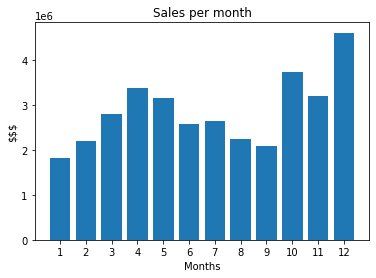

In [14]:

months = range(1,13)
plt.bar(months, Months["TotalSales"])
plt.xlabel('Months')
plt.ylabel('$$$')
plt.xticks(months)
plt.title("Sales per month")
plt.show()



### December had the most amount of Sales, but there was an increase in sales in April and October as well. Why?

## Question 2: What city Sold the most Products?

#### First we have to create another column with just the city which we have to extract out of the Purchase Address column then group by the city and sum up all values. 

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['Cities'] = df['Purchase Address'].apply(lambda x: get_city(x) )
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TotalSales,Month,Cities
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles (CA)
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco (CA)
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco (CA)


In [16]:
CitySales =df.groupby('Cities').sum()

CitySales

,Quantity Ordered,Price Each,TotalSales
Cities,,,
Atlanta (GA),16602.0,2.779908e+06,2.795499e+06
Austin (TX),11153.0,1.809874e+06,1.819582e+06
Boston (MA),22528.0,3.637410e+06,3.661642e+06
Dallas (TX),16730.0,2.752628e+06,2.767975e+06
Los Angeles (CA),33289.0,5.421435e+06,5.452571e+06
New York City (NY),27932.0,4.635371e+06,4.664317e+06
Portland (ME),2750.0,4.471893e+05,4.497583e+05
Portland (OR),11303.0,1.860558e+06,1.870732e+06
San Francisco (CA),50239.0,8.211462e+06,8.262204e+06


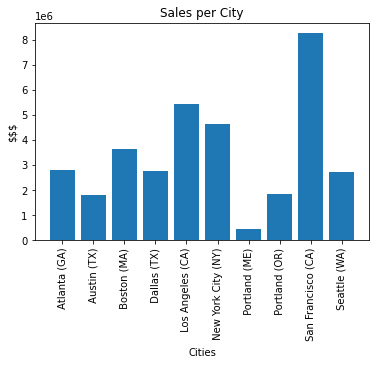

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [17]:
X = [Cities for Cities, df in df.groupby('Cities')]
Y = CitySales['TotalSales']
plt.bar(X,Y)
plt.xticks(X, rotation = 90)
plt.xlabel('Cities')
plt.ylabel('$$$')
plt.title('Sales per City')
plt.show()
X

### San Fransisco CA had the most amount of Sales

### Question 3: What time should we display advertisements to maximize liklihood of customer buying product? 

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TotalSales,Month,Cities,Hour,Minute,Count
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston (MA),22,30,1
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles (CA),9,27,1


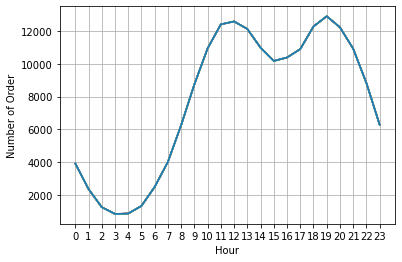

In [19]:
x = [Hour for Hour, df in df.groupby('Hour')]
plt.plot(x,(df.groupby(['Hour']).count()))
plt.xlabel("Hour")
plt.ylabel('Number of Order')
plt.xticks(x)
plt.grid()
plt.show()


### Advertise at 11 Am and 7 Pm

### What products are most often sold together?

On the data, when the order ID is the same, means that these items were ordered together. 

In [20]:
df1 = df[df['Order ID'].duplicated(keep = False)]
#creating a new data frame whch only contains the duplicated ID numbers representative of items sold together. 

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# groups all the order ids together, takes the product in the product column, sets it to x, finds next same id, takes that 
#product and adds comma and joins second prodcut 

df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
# let the data frame only have order id and grouped values and drop the duplicates, we will see each order Id with the
# all the items that are in one unique order ID are grouped together

df1.head(30)

# now we have to count the occurances of same grouped items. 





<ipython-input-20-337961728501>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
#iterated through the df1 dataframe and created a list of grouped items separated by a comma
#counted each unique combinatation in the list created above and asked for the common 2 items sold together
    
count.most_common(10)

#2 items in common were Iphone and The Lightening Charger
# 3 Items in common were Google Phone, USB C Charging Cable, and Wired Headphones
# 4 comms were iphone, charger, airpods, and wired headphones




    
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What Product Sold the Most?

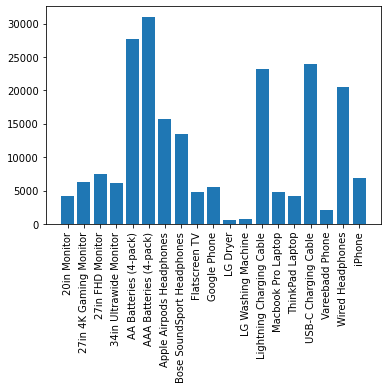

In [22]:
product_group = df.groupby('Product')
QO = product_group.sum()['Quantity Ordered']

products = [Product for Product,df in product_group]
plt.bar(products, QO)
plt.xticks(products, rotation = 90)
plt.show()

#AAA batteries

### Which Product made the most money?

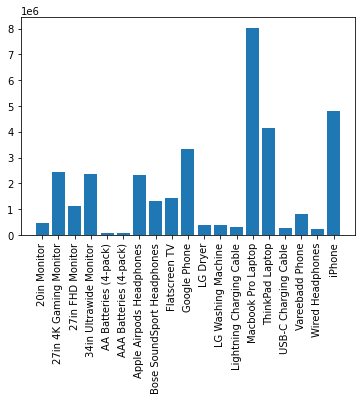

In [23]:
product_group = df.groupby('Product')
QO = product_group.sum()
Y = QO['Price Each']


products = [Product for Product,df in product_group]
plt.bar(products,Y)
plt.xticks(products, rotation = 90)
plt.show()
#Macbook Pro Laptop